#                   All Figures                    #

In [1]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#
#                   All Figures                    #
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%#

rm(list=ls())
graphics.off()

require('tidyverse')
require('data.table')
require('rTPC')
require('car')
require('grDevices')
require('Cairo')
require('ggplot2')
require('ggpubr')
require('patchwork')
require('cowplot')
require('ggtext')

Loading required package: tidyverse

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


Loading required package: rTPC

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘rTPC’”
Loading required package: car

Loading req

[1] "Acyrthosiphon pisum"         "Aedes aegypti"              
 [3] "Aedes albopictus"            "Aedes krombeini"            
 [5] "Amblyseius swirskii"         "Amblyseius womersleyi"      
 [7] "Anopheles gambiae"           "Anoplophora glabripennis"   
 [9] "Antestiopsis thunbergii"     "Anthonomus grandis"         
[11] "Aphis gossypii"              "Aphis nasturtii"            
[13] "Aubeonymus mariaefranciscae" "Bemisia tabaci"             
[15] "Callosobruchus analis"       "Callosobruchus chinensis"   
[17] "Callosobruchus maculatus"    "Callosobruchus rhodesianus" 
[19] "Clavigralla tomentosicollis" "Culex annulirostris"        
[21] "Culex pipiens"               "Culex quinquefasciatus"     
[23] "Drosophila suzukii"          "Gastrolina depressa"        
[25] "Halyomorpha halys"           "Harmonia axyridis"          
[27] "Helicoverpa armigera"        "Hylobius transversovittatus"
[29] "Iphiseius degenerans"        "Kampimodromus aberrans"     
[31] "Laricobius nigrinus"         "Leptinotarsa decemlineata"  
[33] "Macrocentrus iridescens"     "Macrosiphum euphorbia"      
[35] "Monochamus leuconotus"       "Muscidifurax raptorellus"   
[37] "Muscidifurax zaraptor"       "Myzus persicae"             
[39] "Otiorhynchus sulcatus"       "Paracoccus marginatus"      
[41] "Phenacoccus solenopsis"      "Planococcus citri"          
[43] "Plutella xylostella"         "Rhopalosiphum maidis"       
[45] "Sepedon spinipes"            "Stethorus punctillum"       
[47] "Tetraneura nigriabdominalis" "Tetranychus evansi"         
[49] "Tetranychus mcdanieli"       "Tetranychus urticae"        
[51] "Thrips hawaiiensis"          "Tribolium castaneum"        
[53] "Trichogramma bruni"          "Trichogramma sp. nr. Lutea"

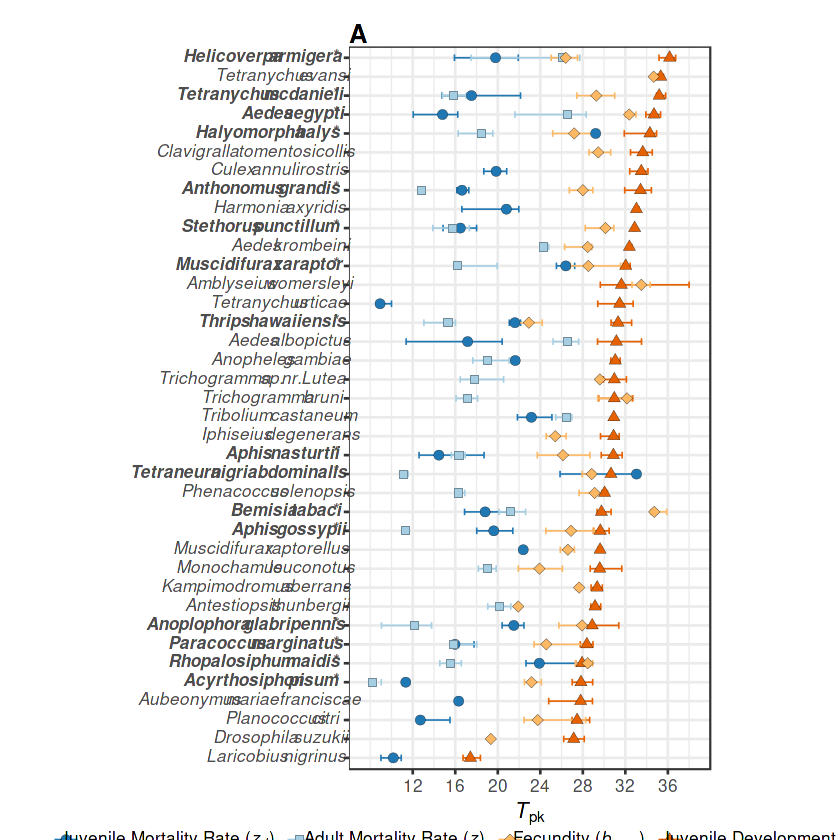

In [2]:
# Figure 3: Tpks + activation energy  plot 

# Tpks for all species

alpha   <- as_tibble(read.csv('../data/alpha_Tpks_AllParams.csv', header = TRUE))
zj      <- as_tibble(read.csv('../data/zj_Tpks_AllParams.csv', header = TRUE))
z       <- as_tibble(read.csv('../data/z_Tpks_AllParams.csv', header = TRUE))
bmax    <- as_tibble(read.csv('../data/bmax_Tpks_AllParams.csv', header = TRUE))

topt  <- rbind(alpha,zj,z,bmax)
toptz <- subset(topt, topt$param=="topt")

toptz$species <- as.factor(toptz$species)
toptz$trait   <- as.factor(toptz$trait)

levels(toptz$species)

toptz$trait <- fct_relevel(toptz$trait, "juvenile mortality rate")

toptz <- toptz %>% filter(param!= "rmax")

SpCount <- table(toptz$species)
RmSp <- names(SpCount)[which(SpCount==1)]

toptz <- filter(toptz, !(species %in% RmSp))

# change name to add asterisk to match next fig
toptz$species <- as.character(toptz$species)
toptz$species[which(toptz$species=="Anthonomus grandis")] <- "**Anthonomus grandis***"
toptz$species[which(toptz$species=="Paracoccus marginatus")] <- "**Paracoccus marginatus***"
toptz$species[which(toptz$species=="Aphis nasturtii")] <- "**Aphis nasturtii***"
toptz$species[which(toptz$species=="Tetraneura nigriabdominalis")] <- "**Tetraneura nigriabdominalis***"
toptz$species[which(toptz$species=="Muscidifurax zaraptor")] <- "**Muscidifurax zaraptor***"
toptz$species[which(toptz$species=="Rhopalosiphum maidis")] <- "**Rhopalosiphum maidis***"
toptz$species[which(toptz$species=="Aedes aegypti")] <- "**Aedes aegypti***"
toptz$species[which(toptz$species=="Helicoverpa armigera")] <- "**Helicoverpa armigera***"
toptz$species[which(toptz$species=="Thrips hawaiiensis")] <- "**Thrips hawaiiensis***"
toptz$species[which(toptz$species=="Tetranychus mcdanieli")] <- "**Tetranychus mcdanieli***"
toptz$species[which(toptz$species=="Halyomorpha halys")] <- "**Halyomorpha halys***"
toptz$species[which(toptz$species=="Bemisia tabaci")] <- "**Bemisia tabaci***"
toptz$species[which(toptz$species=="Aphis gossypii")] <- "**Aphis gossypii***"
toptz$species[which(toptz$species=="Anoplophora glabripennis")] <- "**Anoplophora glabripennis***"
toptz$species[which(toptz$species=="Stethorus punctillum")] <- "**Stethorus punctillum***"
toptz$species[which(toptz$species=="Acyrthosiphon pisum")] <- "**Acyrthosiphon pisum***"

toptz <- toptz %>% filter(species != 'Plutella xylostella')

#order by developement alpha
alp <- subset(toptz, toptz$trait=="juvenile development rate")
SPorder <- alp$species[order(alp$estimate)]
toptz$species <- factor(toptz$species, levels=SPorder)

# All traits

fig3a <- ggplot(toptz, aes(estimate, species, shape=trait, colour=trait,fill=trait)) +
  geom_errorbar(aes(xmin = conf_lower, xmax = conf_upper),width=0.35,size=0.35) +
  geom_point(size = 2.5, col="#000000",stroke=0.1)+
  theme_bw(base_size = 12.5) +
  theme(axis.title.y = element_blank())+
  scale_x_continuous(expression(plain(paste("", italic(T)[pk]))),
                     limits =c(6,40),
                     expand = c(0, 0),
                     breaks=seq(12,36, by=4))+
  scale_fill_manual(labels = c(expression(plain(paste("Juvenile Mortality Rate (",italic(z[J]),")"))),
                               expression(plain(paste("Adult Mortality Rate (",italic(z),")"))),
                               expression(plain(paste("Fecundity (",italic(b[max]),")"))),
                               expression(plain(paste("Juvenile Development Rate (",italic(alpha),")")))),
                    values = c("#1f78b4","#a6cee3","#fdb863","#e66101"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow = 1,ncol =4,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(labels = c(expression(plain(paste("Juvenile Mortality Rate (",italic(z[J]),")"))),
                                 expression(plain(paste("Adult Mortality Rate (",italic(z),")"))),
                                 expression(plain(paste("Fecundity (",italic(b[max]),")"))),
                                 expression(plain(paste("Juvenile Development Rate (",italic(alpha),")")))),
                      values = c("#1f78b4","#a6cee3","#fdb863","#e66101"),
                      name=expression(bold("")),
                      guide = guide_legend(nrow=1,ncol=4,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.5))+
  scale_shape_manual(labels = c(expression(plain(paste("Juvenile Mortality Rate (",italic(z[J]),")"))),
                                expression(plain(paste("Adult Mortality Rate (",italic(z),")"))),
                                expression(plain(paste("Fecundity (",italic(b[max]),")"))),
                                expression(plain(paste("Juvenile Development Rate (",italic(alpha),")")))),
                     values = c(21,22,23,24),
                     name=expression(bold("")),
                     guide = guide_legend(nrow = 1,ncol =4,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  theme(legend.position = c(0.35,-0.1),legend.text = element_text(size = 10),
        axis.text.y = element_markdown(face = 'italic'))+
  theme(text=element_text(family="Times"))+
  theme(legend.margin=margin(t = -0.4, unit='cm'))+
  # coord_fixed(ratio = 1.5)
  theme(aspect.ratio=2)+
  ggtitle("A")+
  theme(plot.title=element_text(face="bold", size = 15, vjust = -1))

fig3a

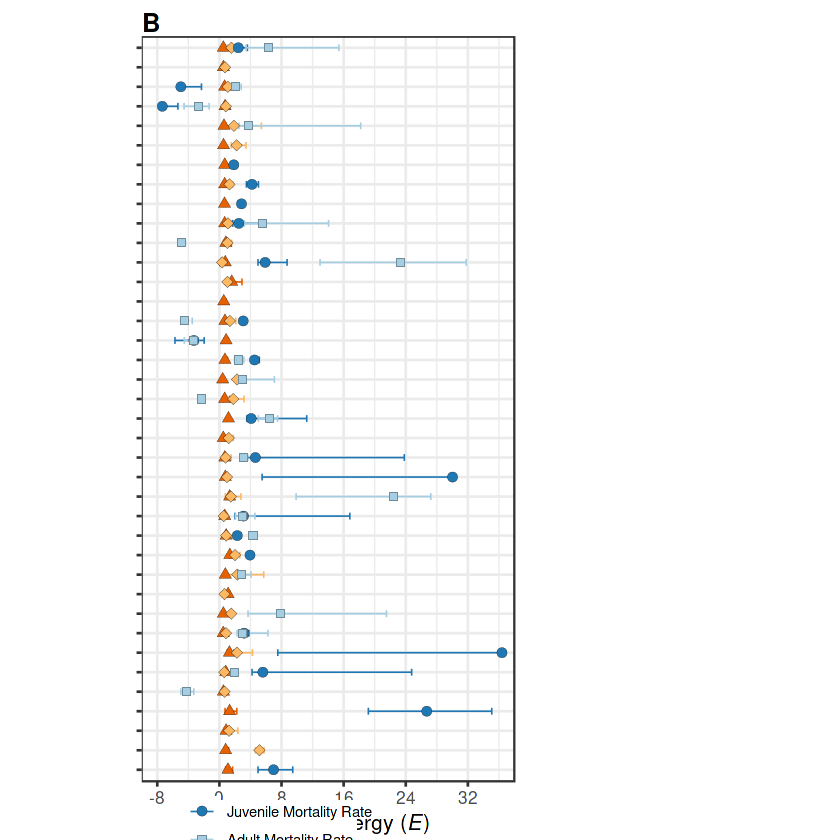

In [3]:
#===============================================
# Fig 3b: Activation energies 

E <-  filter(topt, trait == 'juvenile development rate' | trait == 'fecundity rate', param =="e")  
eh <- filter(topt, trait == 'juvenile mortality rate' | trait == 'adult mortality rate', param =="eh") %>%
  mutate(param=replace(param, param=='eh', 'e')) %>%
  filter(estimate > -8 & estimate < 50)

eh[8,3] <- -7.36; eh[23,3] <- -4.97; eh[41,3] <- -4.55; eh[22,3] <- -4.97
eh[16,4] <- 36.393048; eh[3,4] <- 30.027643

activation_e <- bind_rows(E, eh) 

# change name to add asterisk to match next fig
activation_e$species <- as.character(activation_e$species)
activation_e$species[which(activation_e$species=="Anthonomus grandis")] <- "**Anthonomus grandis***"
activation_e$species[which(activation_e$species=="Paracoccus marginatus")] <- "**Paracoccus marginatus***"
activation_e$species[which(activation_e$species=="Aphis nasturtii")] <- "**Aphis nasturtii***"
activation_e$species[which(activation_e$species=="Tetraneura nigriabdominalis")] <- "**Tetraneura nigriabdominalis***"
activation_e$species[which(activation_e$species=="Muscidifurax zaraptor")] <- "**Muscidifurax zaraptor***"
activation_e$species[which(activation_e$species=="Rhopalosiphum maidis")] <- "**Rhopalosiphum maidis***"
activation_e$species[which(activation_e$species=="Aedes aegypti")] <- "**Aedes aegypti***"
activation_e$species[which(activation_e$species=="Helicoverpa armigera")] <- "**Helicoverpa armigera***"
activation_e$species[which(activation_e$species=="Thrips hawaiiensis")] <- "**Thrips hawaiiensis***"
activation_e$species[which(activation_e$species=="Tetranychus mcdanieli")] <- "**Tetranychus mcdanieli***"
activation_e$species[which(activation_e$species=="Halyomorpha halys")] <- "**Halyomorpha halys***"
activation_e$species[which(activation_e$species=="Bemisia tabaci")] <- "**Bemisia tabaci***"
activation_e$species[which(activation_e$species=="Aphis gossypii")] <- "**Aphis gossypii***"
activation_e$species[which(activation_e$species=="Anoplophora glabripennis")] <- "**Anoplophora glabripennis***"
activation_e$species[which(activation_e$species=="Stethorus punctillum")] <- "**Stethorus punctillum***"
activation_e$species[which(activation_e$species=="Acyrthosiphon pisum")] <- "**Acyrthosiphon pisum***"


activation_e <- mutate(activation_e,
                       trait = case_when(trait =="adult mortality rate" ~ "Adult Mortality Rate",
                                         trait == "fecundity rate" ~ "Peak Fecundity",
                                         trait == "juvenile development rate" ~ "Development Rate",
                                         trait == "juvenile mortality rate" ~ "Juvenile Mortality Rate"))



TraitLevel <- c("Juvenile Mortality Rate", "Adult Mortality Rate","Peak Fecundity","Development Rate" )
activation_e$trait <- as.character(activation_e$trait)
activation_e$trait <- factor(activation_e$trait, levels = TraitLevel)
activation_e$species <- as.character(activation_e$species)
activation_e$species <- factor(activation_e$species, levels=SPorder)
activation_e <- na.omit(activation_e)


fig3b <- ggplot(activation_e, aes(estimate, species, shape=trait, colour=trait,fill=trait)) +
  geom_errorbar(aes(xmin = conf_lower, xmax = conf_upper),width=0.35,size=0.35) +
  geom_point(size = 2.5, col="#000000",stroke=0.1)+
  theme_bw(base_size = 12.5) +
  theme(axis.title.y = element_blank())+
  scale_x_continuous(expression(plain(paste("Activation Energy (",italic(E),")"))),
                     limits =c(-10,38),
                     expand = c(0, 0),
                     breaks=seq(-8,32, by=8))+
  scale_fill_manual(values = c("#1f78b4","#a6cee3","#fdb863","#e66101"),
                    name=expression(bold("")))+
  scale_colour_manual(values = c("#1f78b4","#a6cee3","#fdb863","#e66101"),
                      name=expression(bold("")),
                      guide = guide_legend(nrow=1,ncol=4,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.5))+
  scale_shape_manual(values = c(21,22,23,24),
                     name=expression(bold("")),
                     guide = guide_legend(nrow = 1,ncol =4,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  theme(legend.position = c(0.35,-0.1),legend.text = element_text(size = 8.5),
        axis.text.y = element_markdown(face = 'italic'))+
  theme(text=element_text(family="Times"))+
  theme(legend.margin=margin(t = -0.4, unit='cm'))+
  theme(axis.text.y=element_blank())+
  theme(plot.margin=margin(l=-4,unit="cm"))+
  theme(aspect.ratio=2)+
  ggtitle("B")+
  theme(plot.title=element_text(face="bold", size = 15, vjust = -1))

fig3b

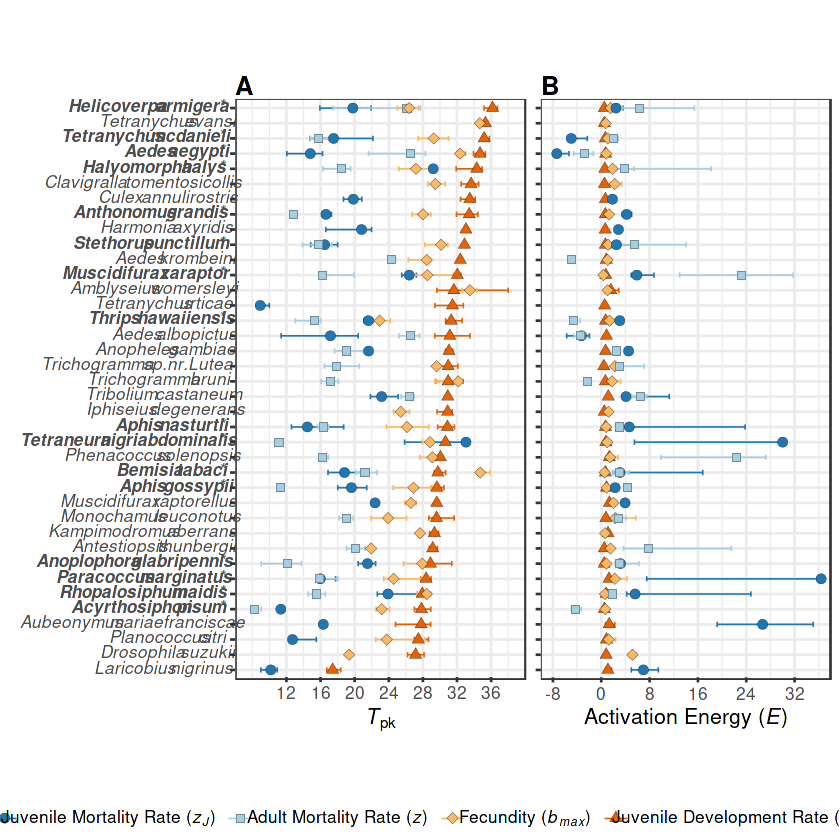

In [4]:
plotMain <- fig3a+theme(legend.position="none")+fig3b+theme(legend.position="none")
# plotMain
legend <- get_legend(fig3a+theme(legend.position = "bottom"))


# plotMain <- plot_grid(plotMain, NULL, rel_widths = c(1,0))

fig3 <- plot_grid(plotMain, legend,ncol = 1, rel_heights = c(1, 0.05))

fig3

# 
save_plot(fig3, file="../results/Fig3.pdf",
          base_height=15,base_asp=1.5, units="cm")

In [14]:
#=======================================================================
# Figure 5: rm_opt plots 

rm(list=ls())
graphics.off()

# plot mass corrected value of r_m at Topt against the peak temperature for r_m
rm_data <- as_tibble(read_csv('../data/rm_optSizeScaling.csv'))

#===================================================
# mass-corrected r_m opt vs r_m Tpks
rm_data$kT <- 1/(8.617333262145 * 10^-5 * (rm_data$rmTpk+273.15))
head(rm_data)


── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  curve_ID = col_double(),
  species = col_character(),
  rmTpk = col_double(),
  rm_opt = col_double(),
  rm_optLwr = col_double(),
  rm_optUpr = col_double(),
  mass = col_double()
)




curve_ID,species,rmTpk,rm_opt,rm_optLwr,rm_optUpr,mass,kT
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Anoplophora glabripennis,28.64865,0.01510336,0.0115713,0.01719946,159.8000000,38.45119
10,Stethorus punctillum,32.47748,0.26677117,0.2486943,0.27684512,0.4800000,37.96949
11,Tetranychus mcdanieli,33.10811,0.51367500,0.4727377,0.52546725,0.0243000,37.89130
12,Muscidifurax zaraptor,22.83784,0.05732966,-14.9437508,0.08514682,0.8950000,39.20606
13,Aphis nasturtii,29.05405,0.23802002,0.2222934,0.25571627,0.8673000,38.39961
14,Rhopalosiphum maidis,28.46847,0.12522888,0.1278068,0.12184787,0.2995714,38.47416


`geom_smooth()` using formula 'y ~ x'



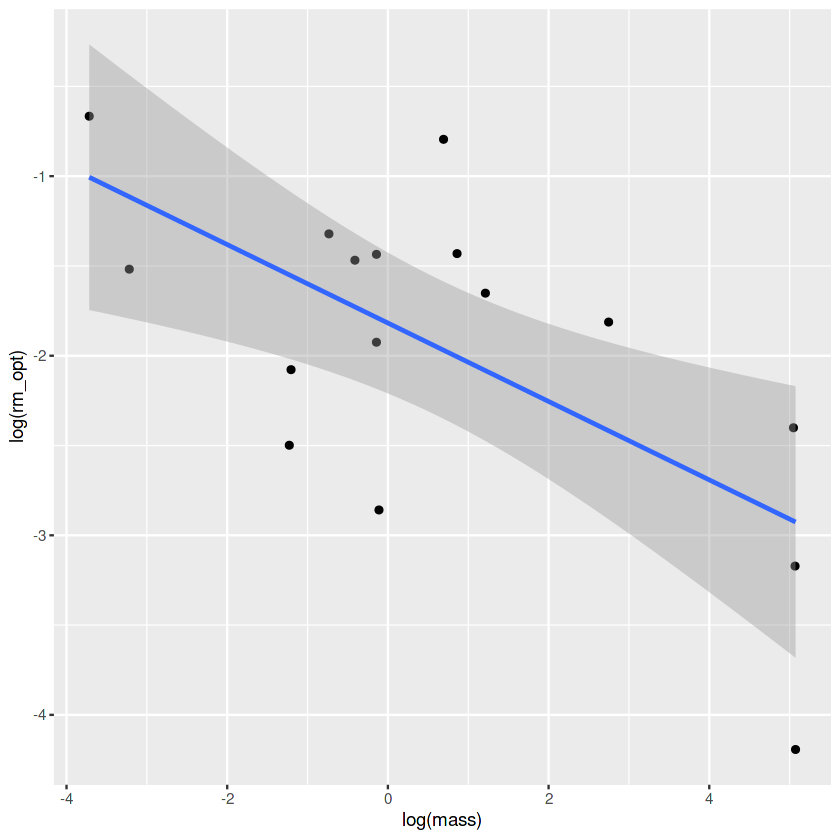

In [16]:
#plot uncorrected data in log-log scale
rm_data %>%
  ggplot(aes(x=log(mass), y = log(rm_opt)))+
  geom_point()+
  geom_smooth(method = 'lm')

`geom_smooth()` using formula 'y ~ x'



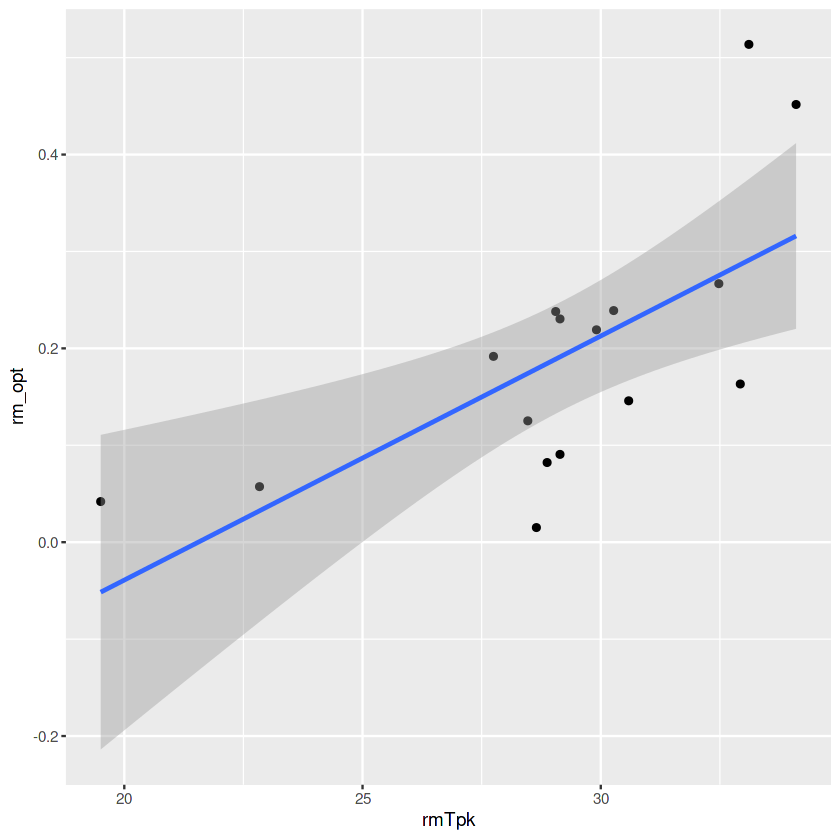

In [18]:
#plot rm_opt vs T
rm_data %>%
  ggplot(aes(x = rmTpk, y = rm_opt)) +
  geom_point()+
  geom_smooth(method = 'lm')

In [19]:
# linear model (note the allometry is linear in log-log scale)
rm_model <- lm(log(rm_opt) ~ log(mass) + kT, data = rm_data)
summary(rm_model)
coef(rm_model)

cf <-  confint(rm_model,level = .95)
anova(rm_model)


Call:
lm(formula = log(rm_opt) ~ log(mass) + kT, data = rm_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4796 -0.2692  0.1033  0.4119  0.6153 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 32.42463   13.62979   2.379   0.0334 *
log(mass)   -0.15841    0.06281  -2.522   0.0255 *
kT          -0.89293    0.35540  -2.512   0.0260 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6066 on 13 degrees of freedom
Multiple R-squared:  0.6114,	Adjusted R-squared:  0.5516 
F-statistic: 10.22 on 2 and 13 DF,  p-value: 0.002148


(Intercept)   log(mass)          kT 
 32.4246261  -0.1584063  -0.8929265

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(mass),1,5.201958,5.2019582,14.137038,0.002382064
kT,1,2.322824,2.3228239,6.312594,0.025969712
Residuals,13,4.783566,0.3679666,NA,NA


Warning message in log(rm_optLwr/mass^coef(rm_model)[2]):
“NaNs produced”
`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



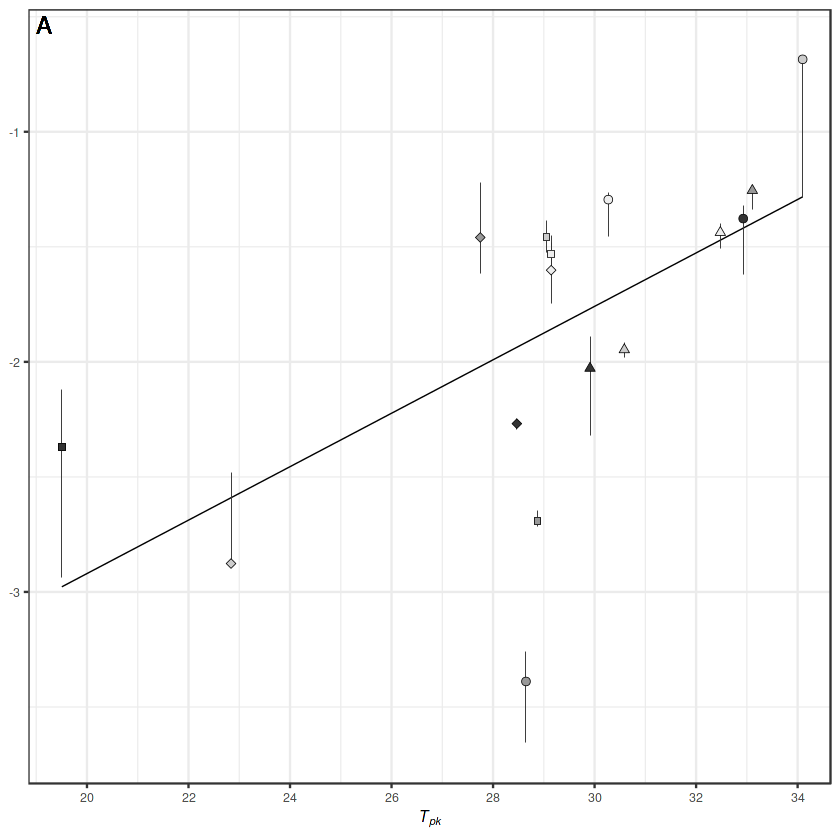

In [21]:
#prepare data for plotting
rm_data <- rm_data %>% 
           mutate(rm_massCor_lwr = log(rm_optLwr/mass^coef(rm_model)[2]),
           rm_massCor     = log(rm_opt/mass^coef(rm_model)[2]),
           rm_massCor_upr = log(rm_optUpr/mass^coef(rm_model)[2])) %>%
           mutate_at(vars(c(rm_massCor_lwr)), 
            ~ifelse(rm_massCor_lwr == 'NaN', -2.8765094, .))

#plot rm_opt in 1/kT, correcting for mass
MassCorrectedrm_opt <- 
  rm_data %>%
  ggplot(aes(x = rmTpk, y = rm_massCor)) +
  geom_smooth(method = 'lm', colour = '#000000', size=0.3, fill=NA)+
  scale_y_continuous(expression(plain(paste("ln(",italic(r[paste(m,",", opt)])," / ",
                                            italic(M^-0.16),"))"))),
                     limits=c(-3.8,-0.5),
                     expand = c(0.01, 0),
                     breaks=seq(-3,-1, by=1))+
  scale_x_continuous(expression(plain(paste(italic("T"[pk])))),
                     limits=c(19,34.5),
                     expand = c(0.01, 0),
                     breaks=seq(20,34, by=2))+
  geom_linerange(aes(x=rmTpk, 
                     ymin= rm_massCor_lwr, 
                     ymax= rm_massCor_upr, colour=species), size=0.2)+
  geom_point(aes(shape = species, fill = species), size=2,stroke=0.25)+
  scale_shape_manual(values = c(21,21,21,21,
                                22,22,22,22,
                                23,23,23,23,
                                24,24,24,24),
                     name=expression(bold("")),
                     guide = guide_legend(nrow=8,ncol=2,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  scale_fill_manual(values = c("#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow=8,ncol=2,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(values = c("#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333"),
                      name=expression(bold("")),
                      guide = guide_legend(nrow=8,ncol=2,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.5))+
  theme_bw()+
  theme(text=element_text(family="Times"))+
  theme(text = element_text(size=9),
        legend.position = 'none',
        legend.text = element_text(size = 4.25, face = 'italic'),
        legend.background = element_rect(colour = "black", size = 0.125), 
        legend.margin=margin(t = 0.05, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.2, 'cm')) +
  geom_text(aes(x = -Inf, y = Inf,hjust = -0.5,vjust=1.4,
                label = "A"),size = 5, colour = "black")+
  theme(axis.title.y = element_blank())


MassCorrectedrm_opt

save_plot(MassCorrectedrm_opt, file="../results/MassCorrectedrm_opt_Tpk.pdf", 
           base_height=9,base_width = 9, base_asp = 0.75,units="cm")

Joining, by = "species"

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



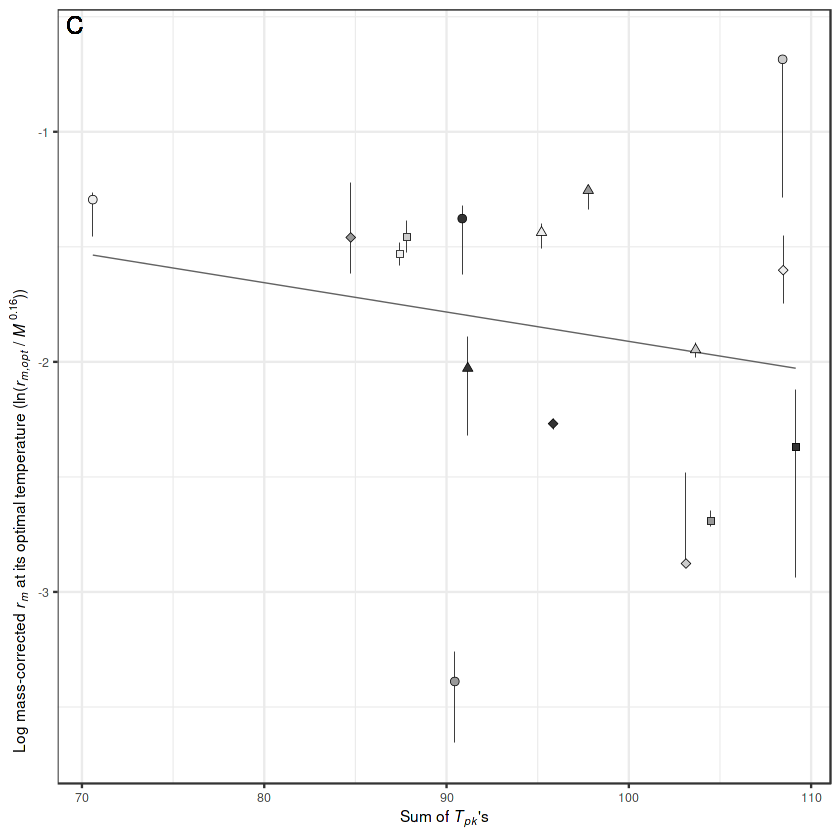

In [25]:
#=======================================================
# sum of trait Tpks versus mass-corrected r_m, opt

Species <- rm_data$species

alphaTpks <- as_tibble(read.csv('../data/alpha_Tpks_AllParams.csv')) %>% 
  filter(param=='topt') %>%
  filter(species %in% Species)%>%
  select(param,species,estimate, conf_lower, conf_upper,trait) %>%
  mutate(estimate = as.numeric(estimate), 
         conf_lower = as.numeric(conf_lower), conf_upper = as.numeric(conf_upper))

zjTpks <- as_tibble(read.csv('../data/zj_Tpks_AllParams.csv')) %>% 
  filter(param=='topt') %>%
  filter(species %in% Species)%>%
  select(param,species,estimate, conf_lower, conf_upper,trait) %>%
  mutate(estimate = as.numeric(estimate), 
         conf_lower = as.numeric(conf_lower), 
         conf_upper = as.numeric(conf_upper))


zTpks <- as_tibble(read.csv('../data/z_Tpks_AllParams.csv')) %>% 
  filter(param=='topt') %>%
  filter(species %in% Species)%>%
  select(param,species,estimate, conf_lower, conf_upper,trait) %>%
  mutate(estimate = as.numeric(estimate), 
         conf_lower = as.numeric(conf_lower), 
         conf_upper = as.numeric(conf_upper))

bmaxTpks <- as_tibble(read.csv('../data/bmax_Tpks_AllParams.csv')) %>% 
  filter(param=='topt') %>%
  filter(species %in% Species)%>%
  select(param,species,estimate, conf_lower, conf_upper,trait) %>%
  mutate(estimate = as.numeric(estimate), 
         conf_lower = as.numeric(conf_lower), 
         conf_upper = as.numeric(conf_upper))


AllTpks <- bind_rows(alphaTpks,zjTpks,zTpks,bmaxTpks)

write_csv(AllTpks, '../results/AllTpkParams.csv')

#Calculate variance and Sum

OptVar <- AllTpks %>% group_by(species) %>%
  summarise(variance = var(estimate))
OptSum <- AllTpks %>% group_by(species) %>%
  summarise(sum = sum(estimate))

SumPlot <- left_join(rm_data, OptSum) 

SumTpks_plot <-
  SumPlot %>%
  ggplot(aes(x = sum, y = rm_massCor))+
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill=NA)+
  scale_y_continuous(expression(plain(paste("Log mass-corrected ",italic(r[m])," at its optimal temperature (ln(",italic(r[paste(m,",", opt)])," / ",
                                            italic(M^-0.16),"))"))),
                     limits=c(-3.8,-0.5),
                     expand = c(0.01, 0),
                     breaks=seq(-3,-1, by=1))+
  scale_x_continuous(expression(plain(paste("Sum of ",italic("T"[pk]),"'s"))))+
  geom_linerange(aes(x=sum, 
                     ymin=rm_massCor_lwr, 
                     ymax=rm_massCor_upr, colour=species), size=0.2)+
  geom_point(aes(shape=species, 
                 fill=species),
             size=2,
             stroke=0.25)+
  scale_shape_manual(values = c(21,21,21,21,
                                22,22,22,22,
                                23,23,23,23,
                                24,24,24,24),
                     name=expression(bold("")),
                     guide = guide_legend(nrow=16,ncol=1,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  scale_fill_manual(values = c("#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow=16,ncol=1,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(values = c("#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333"),
                      name=expression(bold("")),
                      guide = guide_legend(nrow=16,ncol=1,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.5))+
  theme_bw()+
  theme(text=element_text(family="Times"))+
  theme(text = element_text(size=9),
        legend.position = 'none',
        legend.text = element_text(size = 4.5, face = 'italic'),
        legend.background = element_rect(colour = "black", size = 0.125), 
        legend.margin=margin(t = 0.05, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.3, 'cm'))+
  geom_text(aes(x = -Inf, y = Inf,hjust = -0.5,vjust=1.4,
                label = "C"),size = 5, colour = "black")+
  theme(axis.title.y = element_text(hjust=0.1))

SumTpks_plot

save_plot(SumTpks_plot, file="../results/MassCorrectedrm_optSumTpks.pdf", 
          base_height=9,base_width = 9, base_asp = 0.75,units="cm")